# Vision - Based - Grasping Signal Processing

**Design of Protocol**

The structure of the protocol remained constant as the instructions for object interaction changes upon selected tasks. The human subject was asked to sit in a neutral position with palms face down, 30cm from the center of the object. Neural activity was collected during two different tasks (task 1 and task 3 were selected from the five tasks that were IRB approved). 

Task 1) solely involves object observation of one of the two objects (object A – black pen or object B – water bottle) presented for seven seconds with no knowledge of future reach-and-grasp tasks (to avoid data bias)

Task 3) involves object observation for three seconds until the sound of an audio cue, at which they were instructed to preform a reach-and-grasp task with object presented. 

Each task was repeated 3 times for each human subject, where each task consisted of 5 runs, with each run consisting of two trials (where one trial was the presentation of either object A (pen - precision grip) or object B (water bottle - transverse cylindrical grip). 

Event logging denoted: 
    No Object = 0
    Object A (pen) = 1
    Object B (water bottle) = 2
   
#####################################################################

**Completed** 

-Parametric/accurate data import

-parametric channel selection

-parametric axes for zoom plots (for zscore plots and brainwave plots)

-detrending with bandpass filter 

-parametric brainwave selection

-brainwave filtering 

####################################################################

TRY to filter raw data with and without z score to see the difference 
Trending/detrending signals (COMPLETE)
    -highpass filters to filter out slower oscillations (0.5Hz, 40/50 Hz EEG data available)
    -bandpass filter between 0.5-40hz

**TODO** 
-Figure out if we should do detrending before or after median referencing, try doing before 
-Contact Fan about raw eeg with detrending/trending in the suite , what could be the issue about the references
-Research using the headset published 

-filtering (within each channel)
    initial condition the first value needs to be 0 
    
    
    
    
    
    
Notes to improve code: change variable names (especially for parameters zoom in) becauae they overwrite each other, better way to select methods 1/2 to import data, more accurate graph labels for axes

# Import Libraries

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import glob, os
import scipy.io.wavfile
import scipy.signal
import scipy.stats as stats

print("Complete")

Complete


# Import Data (Method #1 or Method #2)

Method #1

In [2]:
#Parent directory 
parentDir = r'/Users/annac/Downloads/VBG_Data/'

#Select date
dates = os.listdir(parentDir)
for date in dates:
    print("Date: " + date)

selected_D = int(input("Select Date: "))
selectedDate = str(selected_D)             #use in entire directory
print("Date Selected: "+selectedDate)
dateDir = r'/Users/annac/Downloads/VBG_Data/' + selectedDate
#print(dateDir)
print('\n')

#Select Subject
subjects = os.listdir(dateDir)
for subject in subjects:
    print("Subject: " + subject)

selected_S = str(input("Select Subject: "))
selectedSubject = str(selected_S)             #use in entire directory
print("Subject Selected: "+selectedSubject)
subjectDir = r'/Users/annac/Downloads/VBG_Data/' + selectedDate + '/' + selectedSubject
#print(subjectDir)
print('\n')

#Select task/trial
tasks = os.listdir(subjectDir)
for task in tasks:
    print("Task: " + task)

selected_T = str(input("Select Task: "))
selectedTask = str(selected_T)             #use in entire directory
print("Task Selected: "+selectedTask)
taskDir = r'/Users/annac/Downloads/VBG_Data/' + selectedDate + '/' + selectedSubject + '/' + selectedTask
#print(taskDir)
print('\n')

#Select time 
times = os.listdir(taskDir)
for time in times:
    print("Time: " + time)

selected_Ti = str(input("Select Time: "))
selectedTime = str(selected_Ti)             #use in entire directory
print("Time Selected: "+selectedTime)
timeDir = r'/Users/annac/Downloads/VBG_Data/' + selectedDate + '/' + selectedSubject + '/' + selectedTask + '/' + selectedTime +'/eeg'
#print(timeDir)
print('\n')

#Select trial file 
trials = os.listdir(timeDir)
for trial in trials:
    print("Trial: " + trial)

selected_Tr = str(input("Select Trial: "))
selectedTrial = str(selected_Tr)             #use in entire directory
print("Time Selected: "+selectedTrial)
print('\n')

method1_Dir = timeDir = r'/Users/annac/Downloads/VBG_Data/' + selectedDate + '/' + selectedSubject + '/' + selectedTask + '/' + selectedTime +'/eeg/' + selectedTrial
print("File Path: " +method1_Dir)
print("Complete")
method1 = True

Date: .ipynb_checkpoints
Date: 2022-Aug-23
Date: 2022-Aug-24
Date: 20220823
Date: 20220824
Date: 20220830
Date: 20220901
Date: 20220902
Date: 20220906
Date: 20220907
Date: 20220928
Date: 20221005
Date: 20221006
Date: PreviousVBG
Date: VBG_Analysis-020923.ipynb
Select Date: 20221005
Date Selected: 20221005


Subject: Subject_3
Subject: test
Select Subject: Subject_3
Subject Selected: Subject_3


Task: Subject_3.txt
Task: task_1
Task: task_3
Select Task: task_3
Task Selected: task_3


Time: 170132
Time: 170727
Time: 171257
Select Time: 171257
Time Selected: 171257


Trial: 0_task_3_EEG.csv
Trial: 1_task_3_EEG.csv
Trial: 2_task_3_EEG.csv
Trial: 3_task_3_EEG.csv
Trial: 4_task_3_EEG.csv
Select Trial: 3_task_3_EEG.csv
Time Selected: 3_task_3_EEG.csv


File Path: /Users/annac/Downloads/VBG_Data/20221005/Subject_3/task_3/171257/eeg/3_task_3_EEG.csv
Complete


Method #2

In [3]:
#Enter parameters below
##########################################################################################################
date = '20220928'       #choose date 
subject_number = '2'    #choose subject number
task_number = '3'       #choose between 1-5
time = 3                #choose 1, 2, or 3 (for each task the run was ran 3 times, 
                                                #each run had 5 files, each file is 1 trial)
trial_number = '3'      #choose between 0-4
##########################################################################################################

#Reading CSV files based on chosen parameters above
parent_dir = r'/Users/annac/Downloads/VBG_Data/' + str(date) + '/Subject_' + str(subject_number) + \
            "/task_"+ str(task_number) + '/'
#print(parent_dir)

#for loop that runs through the folder with the specific times 
count = 0
filenames = os.listdir(parent_dir)
for filename in filenames:
    count = count + 1
    if count == time:
        time = filename
        print(time)
        break
        
method2_Dir = r'/Users/annac/Downloads/VBG_Data/' + str(date) + '/Subject_' + str(subject_number) + \
            "/task_"+ str(task_number) + '/' + str(time) + '/eeg/' \
            + str(trial_number) + '_task_' + str(task_number) + '_EEG.csv'

print(method2_Dir)
print("Complete")
method1 = False

115620
/Users/annac/Downloads/VBG_Data/20220928/Subject_2/task_3/115620/eeg/3_task_3_EEG.csv


Finalize Directory based on selected method 

In [3]:
if method1 == True: 
    csv_file = method1_Dir
    method = "Method 1 Directory: "
else:
    csv_file = method2_Dir
    method = "Method 2 Directory: "
print(method+csv_file)
print("Complete")

Method 1 Directory: /Users/annac/Downloads/VBG_Data/20221005/Subject_3/task_3/171257/eeg/3_task_3_EEG.csv
Complete


# Load Data

In [4]:
data = pd.read_csv(csv_file)
print(data.head())
print("Complete")

           FZ         FC1         FC2          C3          CZ          C4  \
0  355798.469  310597.719  400416.594  429218.875  339712.125  323426.281   
1  355881.188  310703.938  400581.812  429354.781  339892.719  323511.281   
2  355947.875  310803.781  400740.969  429473.594  340084.750  323543.219   
3  355877.344  310707.688  400585.750  429345.188  339922.312  323456.219   
4  355809.469  310598.875  400397.000  429204.312  339711.125  323415.719   

          CPZ          PZ   AccelX   AccelY   AccelZ   GyroX   GyroY   GyroZ  \
0  281461.938  314148.500   -0.056    0.975    0.317  -1.312   1.526  -1.190   
1  281632.188  314418.531   -0.053    0.976    0.315  -1.404   1.587  -1.099   
2  281808.219  315063.781   -0.053    0.975    0.318  -1.373   1.617  -0.946   
3  281651.125  314871.625   -0.052    0.975    0.315  -1.404   1.648  -0.671   
4  281445.938  314203.750   -0.051    0.974    0.316  -1.404   1.770  -0.397   

    Battery   Sample   Unkown  
0    93.333      0.0    

# Visualization of Raw EEG Data 

Generate plots for all/individual EEG channels for selected subject/task/trial

Index(['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'], dtype='object')


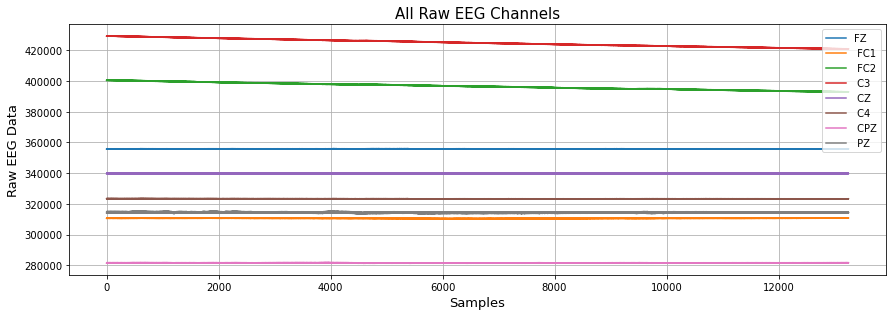

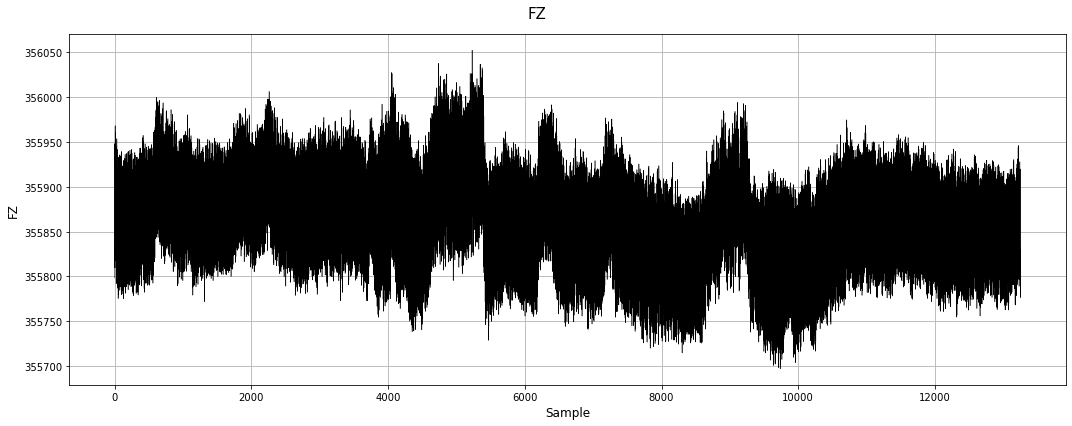

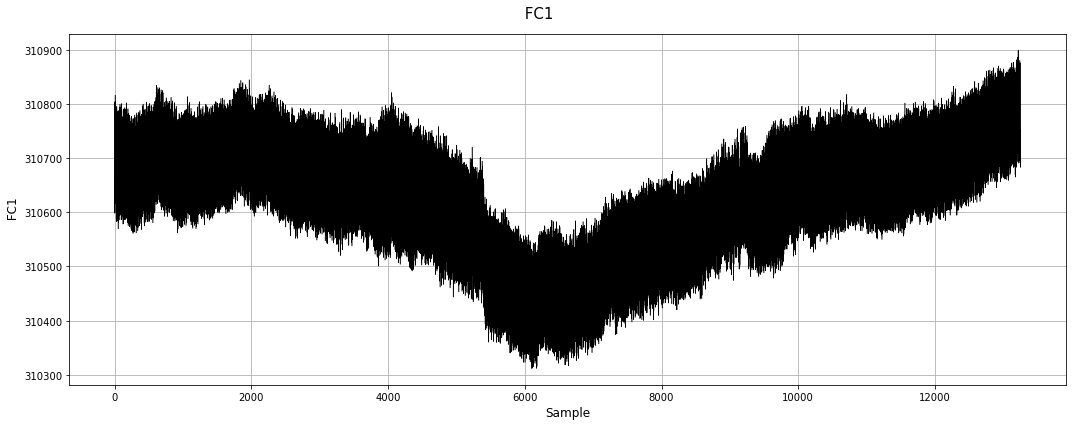

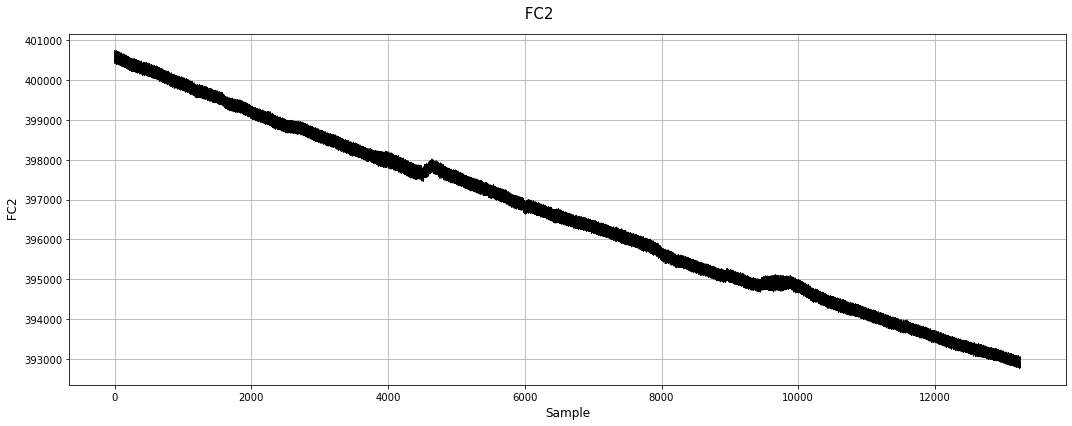

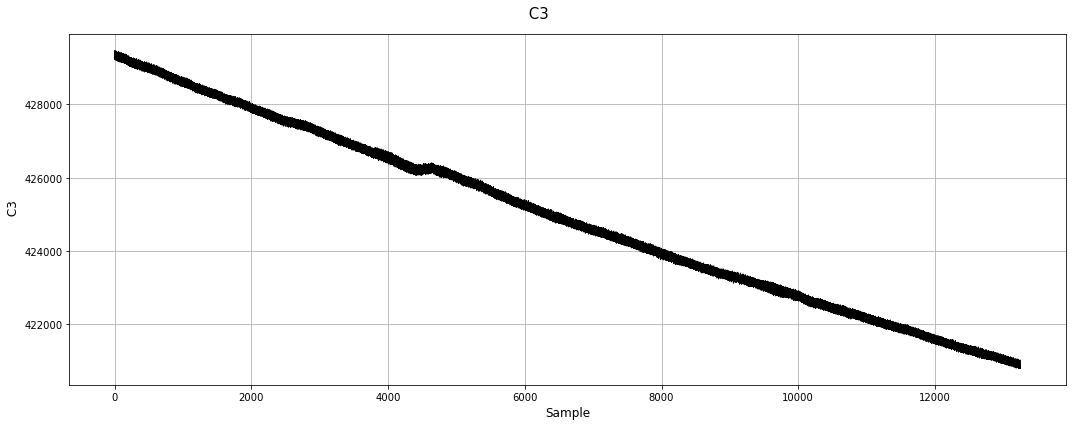

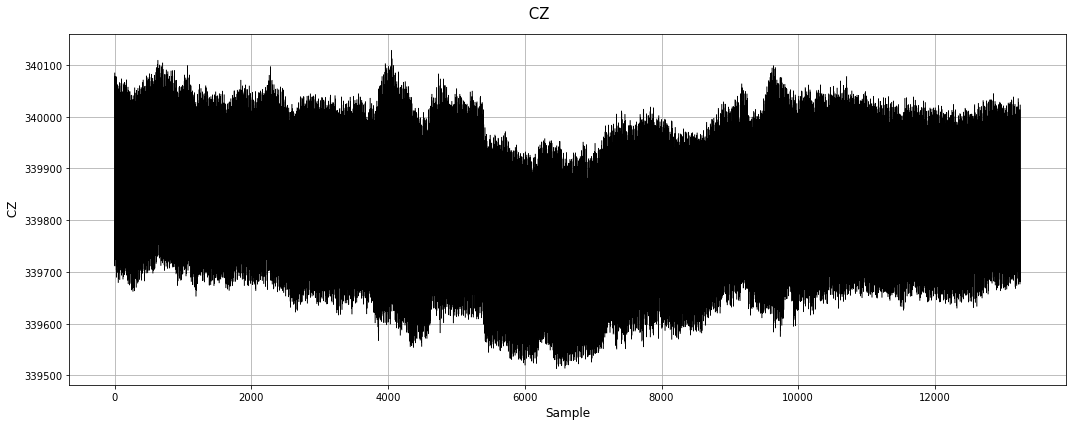

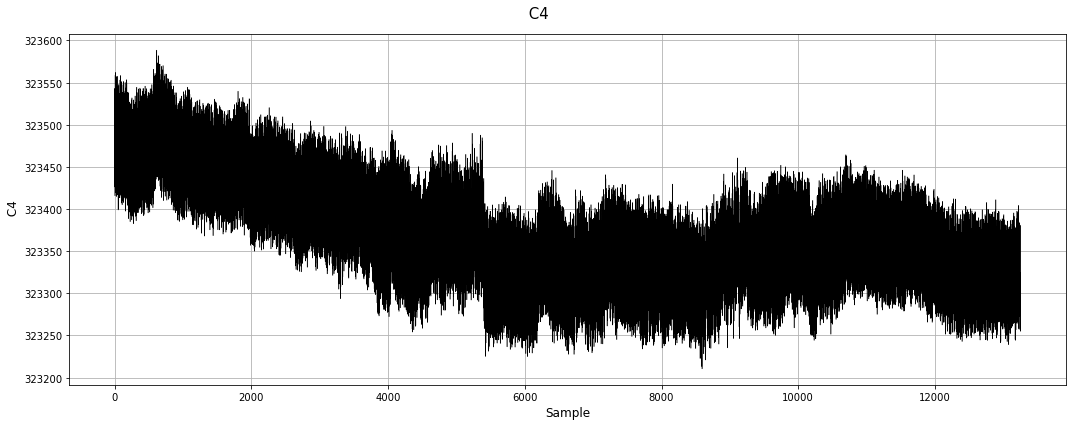

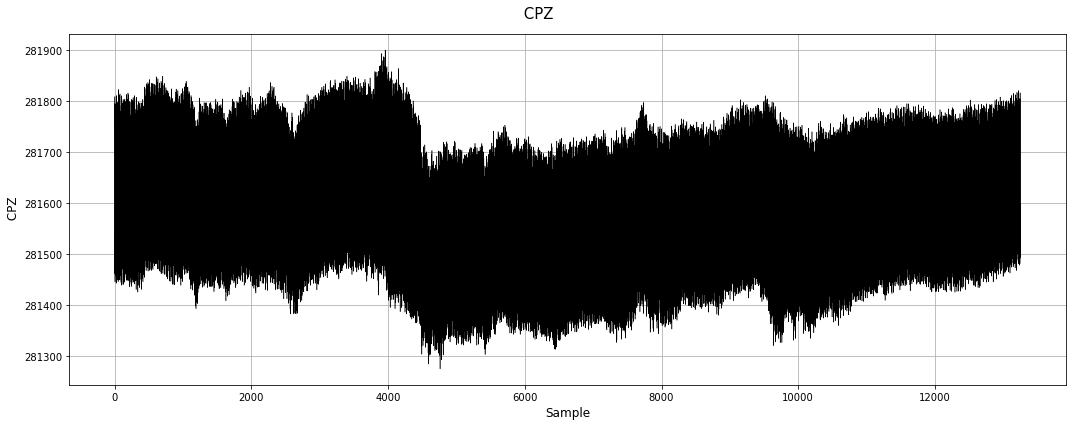

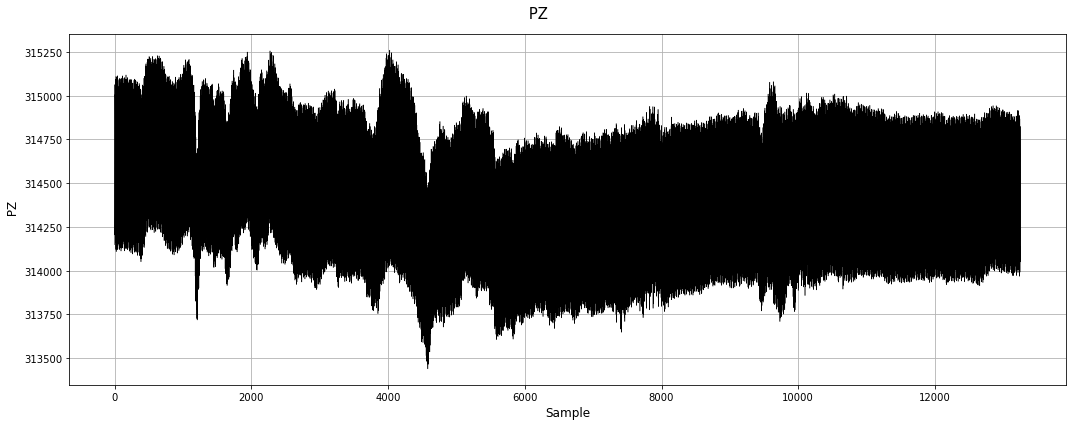

In [6]:
df_allData = pd.DataFrame(data)                       #create pandas dataframe for all data 

df_EEG = pd.DataFrame(data)                           #create pandas dataframe for ONLY 8 channel EEG Data 
df_EEG.drop([ ' AccelX',' AccelY', ' AccelZ', ' GyroX', ' GyroY', ' GyroZ', ' Battery', ' Sample', ' Unkown'], inplace=True, axis=1)
columns = df_EEG.columns                              #create dataframe for column names 
print(df_EEG.columns)

samples_list = list(df_allData[' Sample'])            #saved sample list
#samples = pd.DataFrame[' Sample']
#print(samples)
#samples_list = samples.values.tolist()
#pz = list(df[' PZ'])
#print(samples_list)

#plot all EEG channels on a single plot
plt.rcParams["figure.figsize"] = [12.50, 4.50]
plt.rcParams["figure.autolayout"] = True
df_allData.plot(x= ' Sample', 
        y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
plt.xlabel('Samples', fontsize = 13)
plt.ylabel('Raw EEG Data', fontsize = 13)
plt.title('All Raw EEG Channels', fontsize = 15)
plt.grid(), plt.show()
 

#plot individual EEG channels on individual plots 
i = 0
for columns in columns:
    x = samples_list
    y = list(df_allData[str(columns)])
    figure, ax1 = plt.subplots(figsize = (15,6))       #subplots for each channel
    ax1.grid('on')
    figure.suptitle(str(columns), fontsize=15)
    ax1.set_xlabel('Sample',fontsize=12)
    ax1.set_ylabel(str(columns), fontsize=12)
    ax1.plot(x, y, linewidth=0.5, color='black')
    
    i = i+1
    if i == 8:                                        #only need to plot 8 channels, other data in dataframe is not needed
        break;

# Referencing across Channels  (Median and Mean Methods)

Median Method

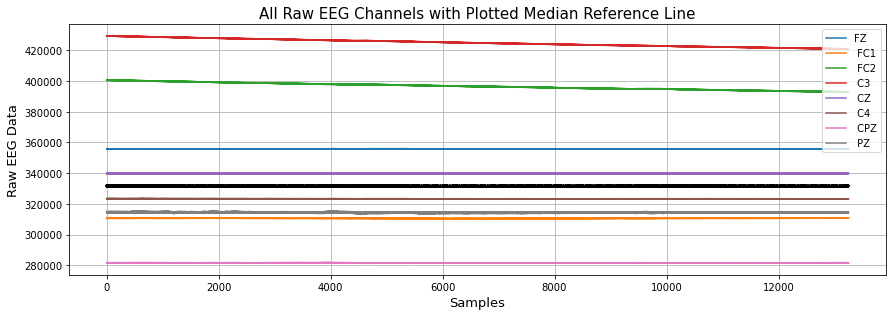

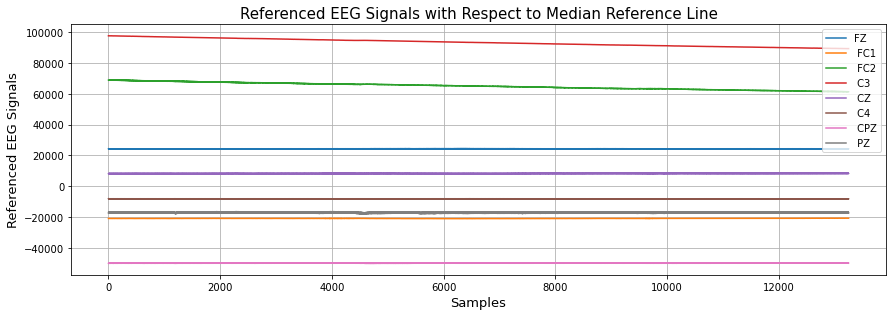

In [7]:
#print(df.head)
EEG_median = list(df_EEG.median(axis = 1))         #median across rows saved in a list (EEG_median)
#print(EEG_median)
#EEG_median_list = df[EEG_median]
#print(EEG_median_list)

df_allData.plot(x= ' Sample',                      #plotting all EEG channels with median reference line 
        y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
plt.plot(samples_list, 
         EEG_median, linestyle='-.', label = "Median" , color = 'black', linewidth = 3)
plt.xlabel('Samples', fontsize = 13), plt.ylabel('Raw EEG Data', fontsize = 13)
plt.title('All Raw EEG Channels with Plotted Median Reference Line', fontsize = 15)
plt.grid()

                                    
sub_EEG_median = df_EEG.sub(EEG_median, axis=0)    #subtract the median list from each element in EEG dataframe (df_EEG - EEG_median)

df_EEG_median = pd.DataFrame(sub_EEG_median,       #convert to dataframe for plotting 
                             columns=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
#print(df_EEG_median.head())
#median WITHOUT samples (for further analysis)
df_EEG_medianWOsamples = pd.DataFrame(sub_EEG_median,       #convert to dataframe for plotting 
                             columns=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
#median WITH samples (for plotting here) 
df_EEG_median['samples_list'] = samples_list       #add the samples list into the df_EEG_Median dataframe for plotting (easier)
#print(df_EEG_median.head)                         #added "samples list" column after 8 EEG columns

df_EEG_median.plot(x='samples_list',               #plot referenced EEG channels with respect to the median reference line
                   y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
#plt.plot(samples_list, EEG_median, linestyle='-.', label = "Median" , color = 'black', linewidth = 3)
plt.xlabel('Samples', fontsize = 13), plt.ylabel('Referenced EEG Signals', fontsize = 13)
plt.title('Referenced EEG Signals with Respect to Median Reference Line', fontsize = 15)
plt.grid()

Mean Method

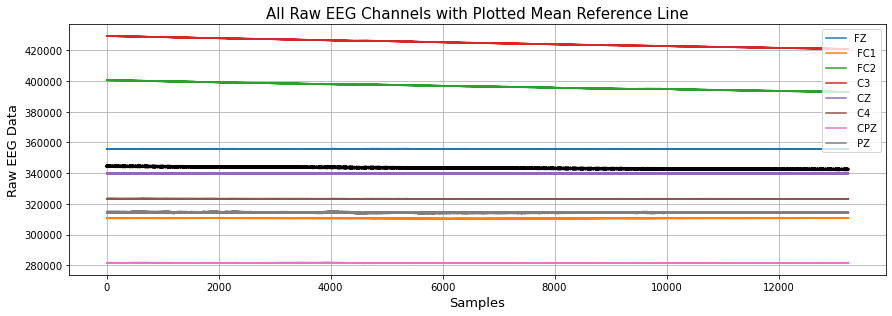

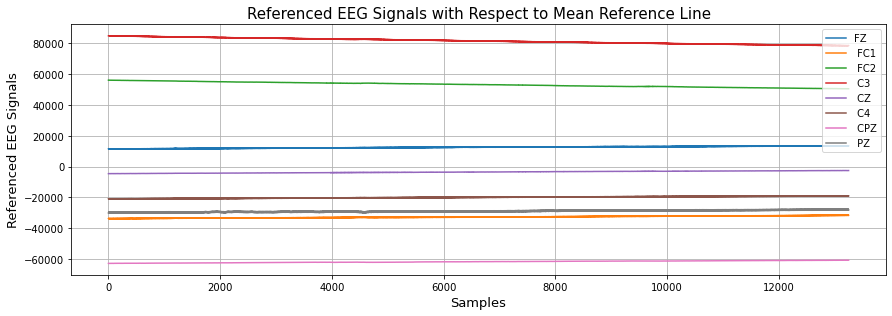

In [8]:
EEG_mean = list(df_EEG.mean(axis = 1))            #mean across rows saved in a list (EEG_median)

df_allData.plot(x= ' Sample',                             #plotting all EEG channels with mean reference line 
        y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
plt.plot(samples_list, 
         EEG_mean, linestyle='-.', label = "Mean" , color = 'black', linewidth = 3)
plt.xlabel('Samples', fontsize = 13), plt.ylabel('Raw EEG Data', fontsize = 13)
plt.title('All Raw EEG Channels with Plotted Mean Reference Line', fontsize = 15)
plt.grid()

                                    
sub_EEG_mean = df_EEG.sub(EEG_mean, axis=0)       #subtract the mean list from each element in EEG dataframe (df_EEG - EEG_mean)
df_EEG_mean = pd.DataFrame(sub_EEG_mean,          #convert to dataframe for plotting 
                             columns=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
df_EEG_mean['samples_list'] = samples_list        #add the samples list into the df_EEG_mean dataframe for plotting (easier)
#print(df_EEG_mean.head)                          #added "samples list" column after 8 EEG columns

df_EEG_mean.plot(x='samples_list',                #plot refernced EEG channels with respect to the median reference line
                   y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
plt.xlabel('Samples', fontsize = 13), plt.ylabel('Referenced EEG Signals', fontsize = 13)
plt.title('Referenced EEG Signals with Respect to Mean Reference Line', fontsize = 15)
plt.grid()

#plot individual channels 
#zoom option? on the graph

# Selecting Channel to Analyze 

Parametric channel selection function

In [9]:
def selectChannel(channel):
    switcher = {
        1: [' FZ'], 2: [' FC1'], 3: [' FC2'], 4: [' C3'], 5: [' CZ'], 6: [' C4'], 7: [' CPZ'], 8: [' PZ']
    }
    return switcher.get(channel, "default")

Select EEG channel to analyze (parameter: channel)

In [12]:
############################################################################
#1 = FZ
#2 = FC1
#3 = FC2
#4 = C3
#5 = CZ
#6 = C4
#7 = CPZ
#8 = PZ

channel = 8
############################################################################
Ch = selectChannel(channel)
print(Ch)

print("Complete")

[' PZ']
Complete


# Z - Scoring 

Z-scoring data

In [13]:
#zscoring (within each channel)
    #grab one channel, and for that channel you zscore, zscoredx = ( x - x(the mean) ) / mu (standard devaition)
    #there is a function that does z scoring in python 
    #zscorfing brings it down to the x axis (kills the mean)
    
#print(df_EEG_medianWOsamples.head)
zscores = stats.zscore(df_EEG_medianWOsamples)
#print(zscores)

df_EEG_zscores = pd.DataFrame(zscores,          #convert to dataframe for plotting 
                             columns=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])

df_EEG_zcoresWOsamples = pd.DataFrame(zscores,          #convert to dataframe for plotting 
                             columns=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])

df_EEG_zscores['samples_list'] = samples_list        #add the samples list into the df_EEG_mean dataframe for plotting (easier)
#print(df_EEG_zscores.head)                          #added "samples list" column after 8 EEG columns
print("Complete")

Complete


Plotting z-scored data

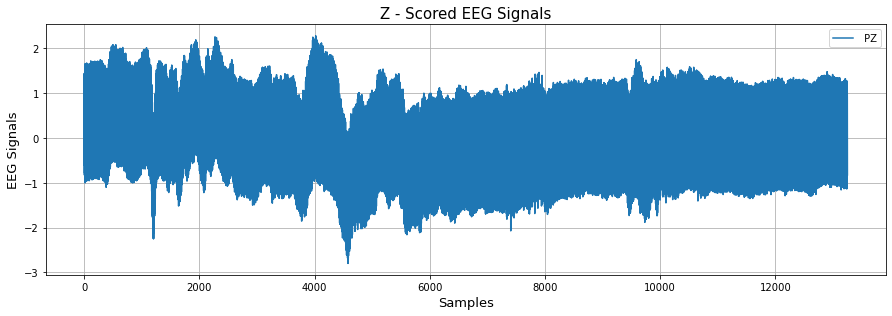

In [14]:
#df_EEG_zscores.plot(x='samples_list',                #plot refernced EEG channels with respect to the median reference line
                   #y=['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])

df_EEG_zscores.plot(x='samples_list',                #plot refernced EEG channels with respect to the median reference line
                   y=Ch)

plt.xlabel('Samples', fontsize = 13), plt.ylabel('EEG Signals', fontsize = 13)
plt.title('Z - Scored EEG Signals', fontsize = 15)
plt.grid()

#print(df_EEG_zcores)

# Z - Score Plot Analyzation 

Select time period to analyze (parameters: x_min, x_max, y_min, y_max)

In [15]:
############################################################################
#2750 - 4250 presentation of first object (glasses on/off)
#3500 buzz to reach and grab 

#5500 - 7000 glasses on to see no object
#6000 buzz to reach and grab nothing 

#8250 - 9750 presenation of second object (glasses on/off)
#8750 buzz to reach and grab object

#10750  - 12250 glasses on to see no object 
#11500 buzz to reach and grab nothing

x_min = 2750
x_max = 3700
y_min = -3
y_max = 3
############################################################################

print("Complete")

Complete


Plot selected time period

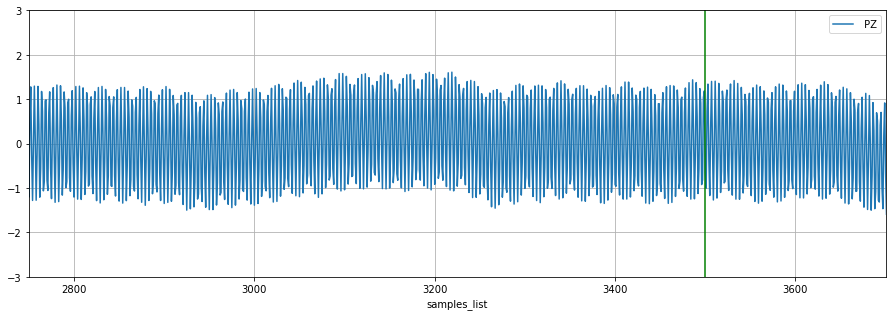

In [16]:
df_EEG_zscores.plot(x='samples_list',                
                    y=Ch)
plt.axis([x_min, x_max, y_min, y_max])
plt.axvline(x=3500, color = 'g')
plt.axvline(x=6000, color = 'g')
plt.axvline(x=11500, color = 'g')
plt.grid()
#print(y_min)

# Detrending EEG Signal

Detrending EEG signal

In [17]:
b, a = scipy.signal.butter(3, [0.5, 50], 'bandpass', fs = 250) 
detrend = scipy.signal.lfilter(b, a, df_EEG_zcoresWOsamples) #output is a numpy array, we need a pandas dataframe for graphing
#print(df_EEG_zscores) #type <class 'pandas.core.frame.DataFrame'>
#print(type(df_EEG_zscores))
#print(filteredBandPass) #type <class 'numpy.ndarray'>
#print(type(filteredBandPass))

samples_list = pd.DataFrame(df_allData[' Sample']) 
df_detrend = pd.DataFrame(detrend, columns = ['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
total1 = pd.concat([df_detrend, samples_list], axis = 1)
#print(df_filteredBandPass) #converting numpy array to pandas dataframe 
#print(type(df_filteredBandPass)) #type <class 'pandas.core.frame.DataFrame'>

print("Complete")

Complete


Plotting detrending EEG signal

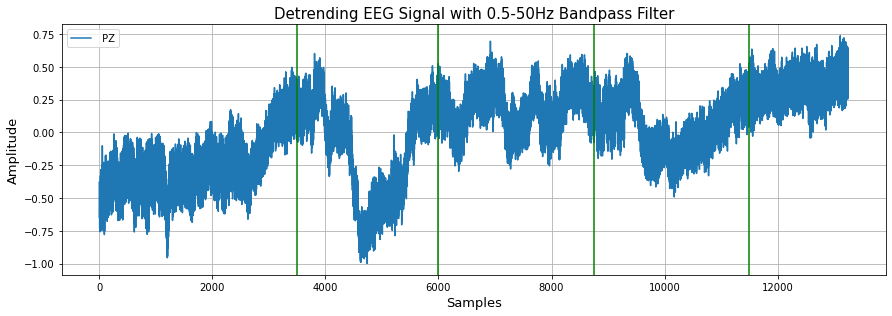

In [18]:
total1.plot(x=' Sample',           
            y=Ch)

plt.xlabel('Samples', fontsize = 13), plt.ylabel('EEG Signals', fontsize = 13)
plt.ylabel('Amplitude')                                 #what exaclty are the units on y axis?
plt.title('Detrending EEG Signal with 0.5-50Hz Bandpass Filter', fontsize = 15)
plt.axvline(x=3500, color = 'g')
plt.axvline(x=6000, color = 'g')
plt.axvline(x=8750, color = 'g')
plt.axvline(x=11500, color = 'g')
plt.grid()

# Filtering Brainwaves (Delta, Theta, Alpha, Beta, Gamma) 

Parametric brainwave selection function

In [19]:
def selectWave(brainWave):
    switcher = {
        1: [0.5, 4], 2: [4, 8], 3: [8, 13], 4: [13, 22], 5: [22, 30]
    }
    return switcher.get(brainWave, "default")

Select brain wave  to analyze (parameter: brainWave)

In [23]:
######################################################
#1 = delta
#2 = theta
#3 = alpha
#4 = beta
#5 = gamma

brainWave = 1  
######################################################
freqRange = selectWave(brainWave)
print(freqRange)

print("Complete")

[0.5, 4]
Complete


Filtering brainwaves

In [24]:
b, a = scipy.signal.butter(3, freqRange, 'bandpass', fs = 250) #theta band 
brainwave = scipy.signal.lfilter(b, a, df_EEG_zcoresWOsamples) #output is a numpy array, we need a pandas dataframe for graphing
#print(df_EEG_zscores) #type <class 'pandas.core.frame.DataFrame'>
#print(type(df_EEG_zscores))
#print(filteredBandPass) #type <class 'numpy.ndarray'>
#print(type(filteredBandPass))

samples_list = pd.DataFrame(df_allData[' Sample']) 
df_brainwave = pd.DataFrame(brainwave, columns = ['FZ', ' FC1', ' FC2', ' C3', ' CZ', ' C4', ' CPZ', ' PZ'])
brainwave_plot = pd.concat([df_brainwave, samples_list], axis = 1)
#print(brainwave_plot.head())
#print(samples_list.head())
#print(df_filteredBandPass) #converting numpy array to pandas dataframe 
#print(type(df_filteredBandPass)) #type <class 'pandas.core.frame.DataFrame'>

print("Complete")

Complete


Plotting brainwaves

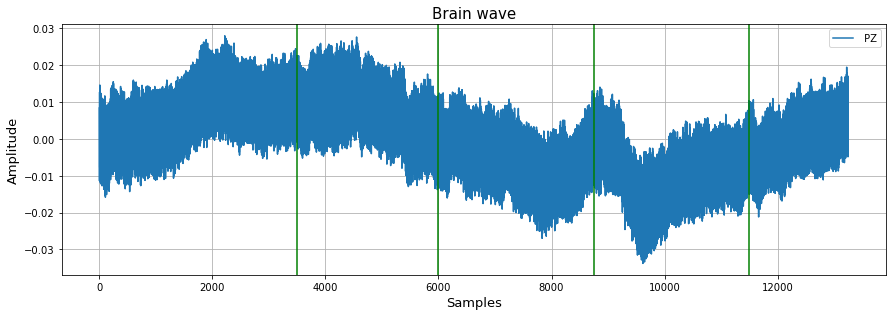

In [25]:
brainwave_plot.plot(x=' Sample',           #plot referenced EEG channels with respect to the median reference line
                    y=Ch)

plt.xlabel('Samples', fontsize = 13), plt.ylabel('EEG Signals', fontsize = 13)
plt.ylabel('Amplitude') #what exaclty are the units on y axis?
plt.title('Brain wave', fontsize = 15)
plt.axvline(x=3500, color = 'g')
plt.axvline(x=6000, color = 'g')
plt.axvline(x=8750, color = 'g')
plt.axvline(x=11500, color = 'g')
plt.grid()

# Brainwave Plot Analyzation

Select time period to analyze (parameters: x_min, x_max, y_min, y_max)

In [28]:
############################################################################
#2750 - 4250 presentation of first object (glasses on/off)
#3500 buzz to reach and grab 

#5500 - 7000 glasses on to see no object
#6000 buzz to reach and grab nothing 

#8250 - 9750 presenation of second object (glasses on/off)
#8750 buzz to reach and grab object

#10750  - 12250 glasses on to see no object 
#11500 buzz to reach and grab nothing

x_min = 3400
x_max = 3600
y_min = -0.03
y_max = 0.03
############################################################################

print("Complete")

Complete


Plotting selected time period

[' PZ']


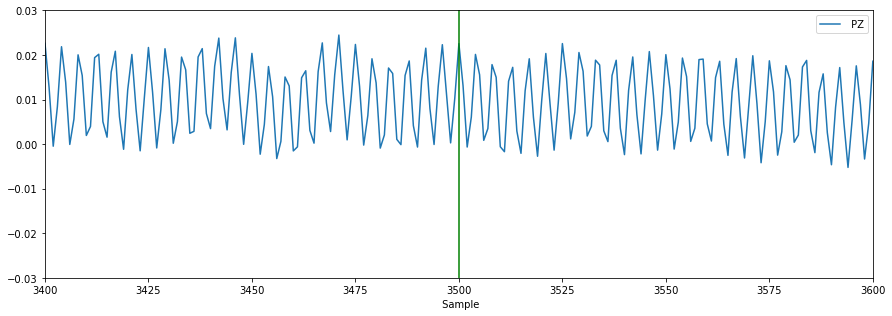

In [29]:
brainwave_plot.plot(x=' Sample',               
                    y=Ch)
print(Ch)
plt.axis([x_min, x_max, y_min, y_max])
plt.axvline(x=3500, color = 'g')
plt.axvline(x=6000, color = 'g')
plt.axvline(x=8750, color = 'g')
plt.axvline(x=11500, color = 'g')

# EEG Power Spectrum Analysis (of selected channel/brainwave)